In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\shopeep_koreantop_clothing_shop_data.csv")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

In [49]:
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [50]:
len(df['shopid'].unique())

387

# Vẽ biểu đồ tần số số lượng shop gia nhập theo các năm

In [51]:
df1 = df[['join_year', 'shopid']]

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   join_year  746 non-null    int64
 1   shopid     746 non-null    int64
dtypes: int64(2)
memory usage: 11.8 KB


<AxesSubplot:xlabel='join_year', ylabel='count'>

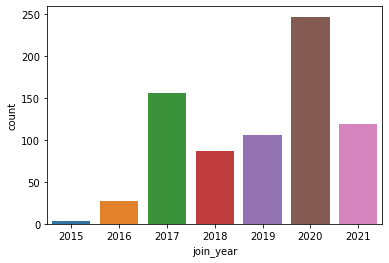

In [53]:
sns.countplot(x = "join_year", data = df1)

# Vẽ biểu đồ xu hướng thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.

In [54]:
df2 = df[['response_rate', 'rating_good']]

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   response_rate  746 non-null    int64
 1   rating_good    746 non-null    int64
dtypes: int64(2)
memory usage: 11.8 KB


In [56]:
import plotly.express as px
fig = px.scatter(df2, x='response_rate', y='rating_good', trendline="ols")
fig.update_layout(title="relation response rate to rating good")
fig.show()

# Vẽ biểu đồ xu hướng thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.

In [92]:
df3 = df[['response_time', 'rating_bad']]

In [82]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   response_time  746 non-null    object
 1   rating_bad     746 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [83]:
df3.head()

,response_time,rating_bad
0,10:13:55,181
1,10:43:05,78
2,08:32:07,4647
3,09:10:38,44
4,11:40:59,680


In [93]:
# slicing till 2nd last element
df3["response_time"]= df3["response_time"].str.slice(7, 9, 1)

C:\Users\FPTSHOP\AppData\Local\Temp/ipykernel_912/3999255740.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
df3.head()

,response_time,rating_bad
0,55,181
1,05,78
2,07,4647
3,38,44
4,59,680


In [96]:
df3 = df3.sort_values(by = "response_time")

In [99]:

fig = px.line(df3, x='response_time', y='rating_bad', title='Life expectancy in Canada')
fig.show()

# Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 

In [100]:
df4 = df[['rating_normal']]

In [102]:
df4.isna().sum()

rating_normal    0
dtype: int64

(array([556.,  66.,  22.,  15.,   8.,   8.,   6.,  10.,   5.,   9.,   3.,
          2.,   4.,   0.,   3.,   0.,   2.,   0.,   1.,   2.,   2.,   3.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   3.,   3.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,
          1.]),
 array([     0.  ,   1530.76,   3061.52,   4592.28,   6123.04,   7653.8 ,
          9184.56,  10715.32,  12246.08,  13776.84,  15307.6 ,  16838.36,
         18369.12,  19899.88,  21430.64,  22961.4 ,  24492.16,  26022.92,
         27553.68,  29084.44,  30615.2 ,  32145.96,  33676.72,  35207.48,
         36738.24,  38

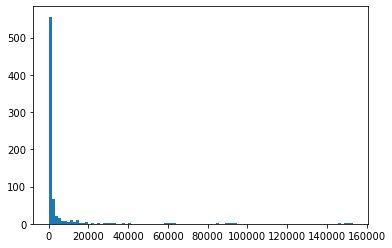

In [105]:
plt.hist(df4, bins = 100)

# Vẽ biểu đồ tần số của cửa hàng chính thức và không chính thức.

In [110]:
df5 = df[['is_official_shop']]

In [111]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   is_official_shop  746 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB


In [112]:
df5.head()

,is_official_shop
0,0
1,0
2,0
3,0
4,0


<AxesSubplot:xlabel='is_official_shop', ylabel='count'>

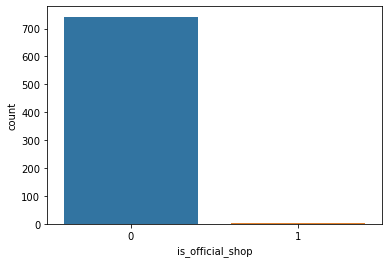

In [113]:
sns.countplot(x="is_official_shop", data=df5)

# Vẽ biểu đồ tần số của cửa hàng được xác thực với chưa xác thực. 

In [114]:
df6 = df[['is_shopee_verified']]

<AxesSubplot:xlabel='is_shopee_verified', ylabel='count'>

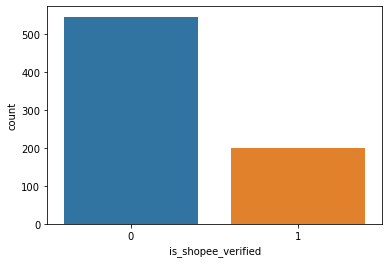

In [116]:
sns.countplot(x="is_shopee_verified", data=df6)